In [1]:
from model import Model
from experiment import Exp
from sim_trial import do_sim
from plot import plot_trial, plot_IPI
import numpy as np
import matplotlib.pyplot as plt

import os

save_path = os.path.join(os.path.expanduser('~'),'Dropbox (Diedrichsenlab)','Papers','SequenceRepetition','figures_raw')
save_path

'/Users/mahdiyar/Dropbox (Diedrichsenlab)/Papers/SequenceRepetition/figures_raw'

# Model replicating behavior

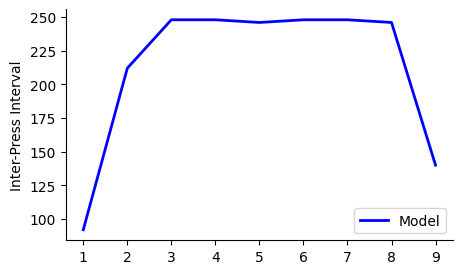

In [6]:
trigger_dict = {'func':'indep','win_trig':1,'param':[0.72]}
plan_dict = {'func':'exp','capacity':10,'param':[0.33,0.01]}

M = Model(Aintegrate=0.9956, Bound=1.4675, plan_dict=plan_dict, trigger_dict=trigger_dict)

IPI = []
T = Exp()
T.seqShow(RT=6000)
T,SIM = do_sim(M,T)
IPI.append(np.diff(T.pressTime))

fig, ax = plot_IPI(IPI,['Model'])
plt.show()
#fig.savefig(os.path.join(save_path,'ipi_model.png'),dpi=300)

# Horizen exp

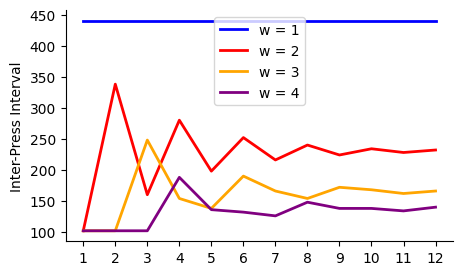

In [3]:
M = Model()
IPI = []
label = []
for w in range(1,5):
    T = Exp()
    T.horizon(w)
    
    T,SIM = do_sim(M,T)

    IPI.append(np.diff(T.pressTime))
    label.append('w = '+str(w))
    
fig, ax = plot_IPI(IPI,label)
#fig.savefig(os.path.join(save_path,'ipi_window.png'),dpi=300)

# Try other triggering rule

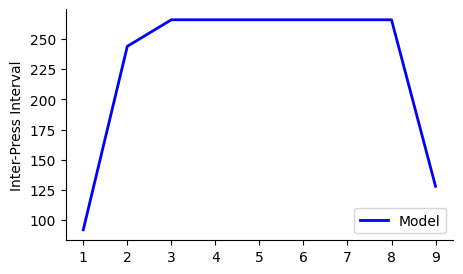

In [17]:
plan_dict = {'func':'exp','capacity':10,'param':[0.33,0.01]}
trigger_dict = {'func':'sum','win_trig':2,'param':[0.43]}

M = Model(Aintegrate=0.9956, Bound=1.4675, plan_dict=plan_dict, trigger_dict=trigger_dict)

IPI = []
T = Exp()
T.seqShow(RT=6000)
T,SIM = do_sim(M,T)
IPI.append(np.diff(T.pressTime))

fig, ax = plot_IPI(IPI,['Model'])
plt.show()
#fig.savefig(os.path.join(save_path,'ipi_model.png'),dpi=300)